<a href="https://colab.research.google.com/github/shoham529-byte/1-repo/blob/main/carpricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [77]:
cars=pd.read_csv("/CarPrice_Assignment.csv")

In [78]:
cols = ['enginesize', 'curbweight', 'horsepower', 'citympg','peakrpm', 'highwaympg']
X = np.column_stack([cars[col].astype(float) for col in cols])
Y = np.array(cars['price'].astype(float)).reshape(-1,1)
print(X.shape)
Y.shape

(205, 6)


(205, 1)

In [79]:
np.random.seed(42)
m = X.shape[0]
indices = np.random.permutation(m)
split_idx = int(m * 0.7)  # 70% train

train_idx = indices[:split_idx]
test_idx  = indices[split_idx:]

X_train = X[train_idx]
Y_train = Y[train_idx].reshape(-1,1)
X_test  = X[test_idx]
Y_test  = Y[test_idx].reshape(-1,1)

In [80]:
mean_X_train = X_train.mean(axis=0)
std_X_train  = X_train.std(axis=0)
X_train_scaled = (X_train - mean_X_train) / std_X_train
X_test_scaled  = (X_test  - mean_X_train) / std_X_train

mean_Y_train = Y_train.mean()
std_Y_train  = Y_train.std()
Y_train_scaled = (Y_train - mean_Y_train) / std_Y_train
Y_test_scaled  = (Y_test - mean_Y_train) / std_Y_train

In [81]:
def CostFunction(X,Y,w,b):
    m = len(Y)
    f = np.dot(X,w) + b
    error = f - Y
    cost = (1/(2*m)) * np.sum(error**2)
    return cost

def compute_gradient(X, Y, w, b):
    m = len(Y)
    f_wb = np.dot(X, w) + b
    error = f_wb - Y

    dj_dw = (1/m) * np.dot(X.T, error)
    dj_db = (1/m) * np.sum(error)

    return dj_dw, dj_db

In [82]:
def gradient_descent(X, Y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = len(Y)
    J_history = []
    w = w_in
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(X, Y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i < 100000:    # prevent resource exhaustion
            J_history.append(cost_function(X, Y, w, b))

    return w, b, J_history

In [83]:
# Set hyperparameters
alpha = 0.01  # Learning rate
num_iters = 1000 # Number of iterations

# Run gradient descent
w_final, b_final, J_hist = gradient_descent(
    X_train_scaled, Y_train_scaled, w, b, CostFunction, compute_gradient, alpha, num_iters
)

print(f"Final weights (w): {w_final.flatten()}")
print(f"Final bias (b): {b_final}")
print(f"Final cost on training set: {J_hist[-1]:.4f}")

Final weights (w): [0.46377347 0.37770924 0.29053232 0.0625183  0.13027802 0.11642757]
Final bias (b): 1.3870412200308171e-16
Final cost on training set: 0.0888


In [84]:
Y_test_pred_scaled = np.dot(X_test_scaled, w_final) + b_final

# MSE & RMSE
mse_test  = np.mean((Y_test_scaled - Y_test_pred_scaled)**2)
rmse_test = np.sqrt(mse_test)

# R²
ss_res = np.sum((Y_test_scaled - Y_test_pred_scaled)**2)
ss_tot = np.sum((Y_test_scaled - np.mean(Y_test_scaled))**2)
r2_test = 1 - (ss_res / ss_tot)

print("Test MSE:", mse_test)
print("Test RMSE:", rmse_test)
print("Test R²:", r2_test)

Test MSE: 0.30950158246015563
Test RMSE: 0.5563286640648275
Test R²: 0.7992773786393976


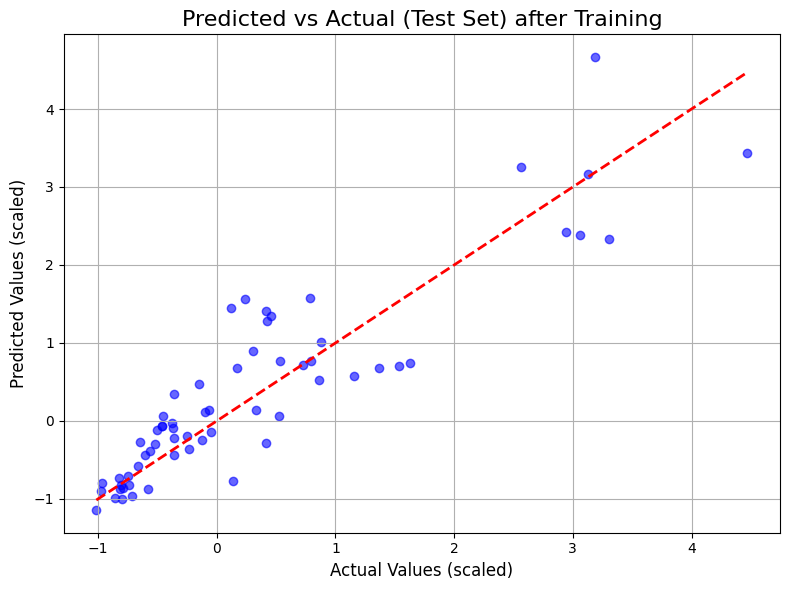

In [85]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test_scaled, Y_test_pred_scaled, alpha=0.6, color='blue')
plt.plot([Y_test_scaled.min(), Y_test_scaled.max()],
         [Y_test_scaled.min(), Y_test_scaled.max()],
         'r--', linewidth=2)
plt.xlabel("Actual Values (scaled)", fontsize=12)
plt.ylabel("Predicted Values (scaled)", fontsize=12)
plt.title("Predicted vs Actual (Test Set) after Training", fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

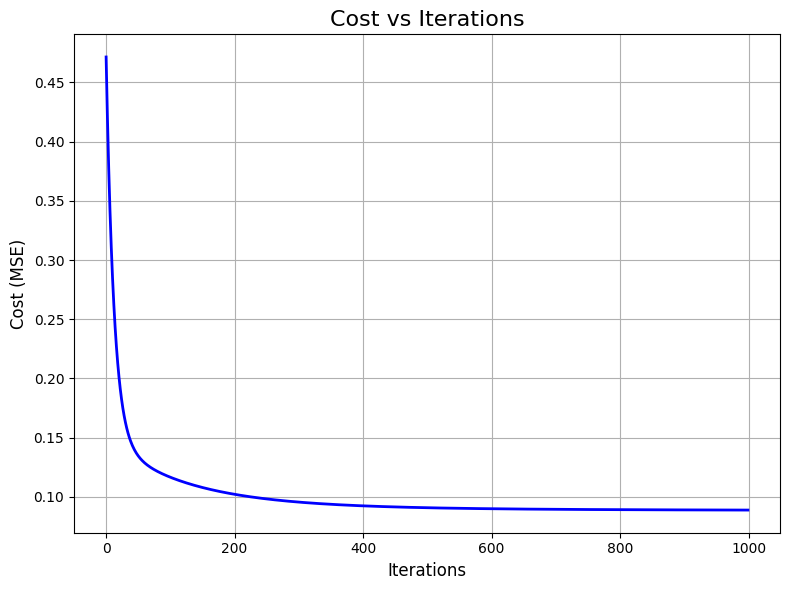

In [86]:
plt.figure(figsize=(8,6))
plt.plot(range(len(J_hist)), J_hist, color='blue', linewidth=2)
plt.title('Cost vs Iterations', fontsize=16)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Cost (MSE)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()